# In this assignment we learn about numerical stability of the covariance matrix, fitting $\chi^2$ distributions, to correct for the Hartlap factor.

## For this assignment no external packages are required. You just need a running conda environment, where numpy and matplotlib are installed.

In [51]:
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy.linalg import inv
from scipy.special import gamma, factorial
from scipy.optimize import curve_fit
from scipy.stats import chi2 as chi2_scp

In [52]:
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rcParams["font.size"] = 16
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

## Preparation: load in the data we need for this assignment.

In [53]:
model=np.load('data_4_assignment1/reference_model.npy') # This will be our reference model
cov=np.load('data_4_assignment1/covariance.npy') # This is the analytical covariance matrix, which we assume is the true covariance of the data

## Task 1: Create two sets of 10000 noisy Gaussian data vectors each using the provided reference model and true covariance matrix. 

In [54]:
noisy_data_set1 = np.random.multivariate_normal(model,cov,10000)
noisy_data_set2 = np.random.multivariate_normal(model,cov,10000)

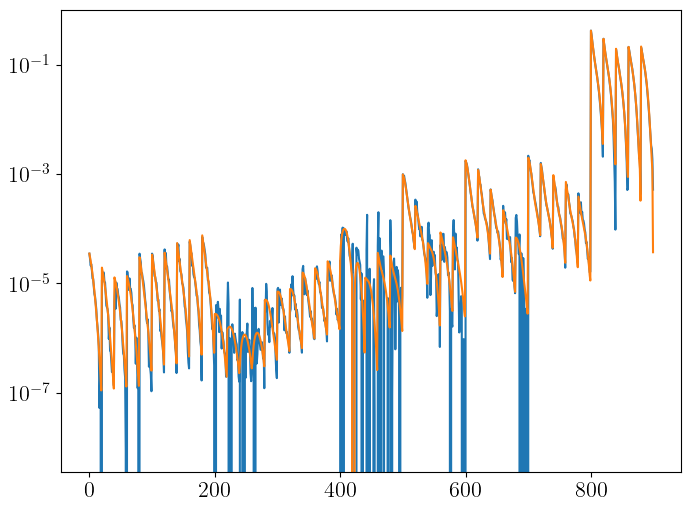

In [55]:
# check that the noisy data vector scatter around the truth
plt.figure(figsize=(8,6),dpi=100)
plt.plot(noisy_data_set1[0])
plt.plot(model)
plt.yscale('log')
plt.show()

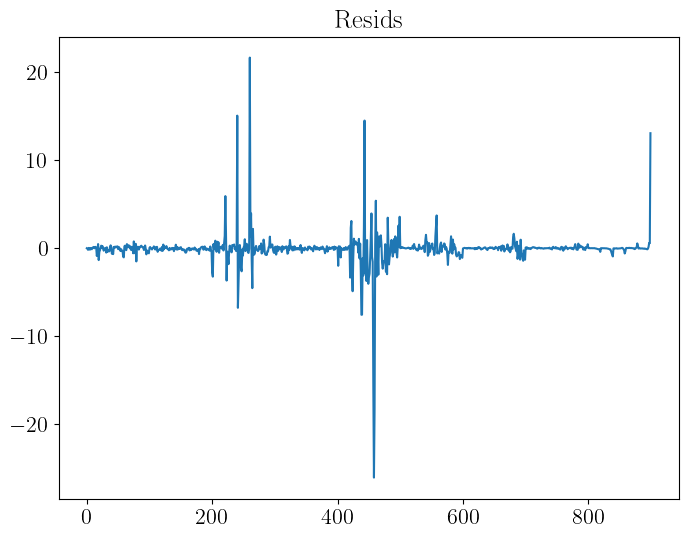

In [56]:
resids = (noisy_data_set1[0] - model) / model

plt.figure(figsize=(8,6),dpi=100)
plt.title('Resids')
plt.plot(resids)
#plt.yscale('log')
plt.show()

## Task 2: 
#### Use the provided covariance matrix and the model as a reference.
### 2.1: Test if set 1 follows a $\chi^2$ distribution with the correct degrees of freedom, by measuring its mean and variance. 
### 2.2: Convince yourself, that the measured $\chi^2$ follows a $\chi^2$ distribution.

mean:		 900.0125304154624
variance:	 1813.5258869841707
ratio:		 2.015000709097921


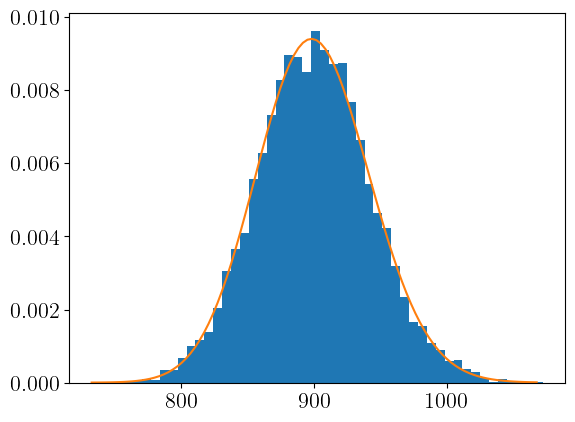

In [57]:
inv_cov = inv(cov)

chi2 = []
for i in range(len(noisy_data_set1)):
    diff = model - noisy_data_set1[i]
    chi2.append(diff.T @ inv_cov @ diff)
# compute the chi^2 for all dv 


# What should the mean and variance should be?

mean = np.mean(chi2)
var = np.var(chi2)
print('mean:\t\t',mean)
print('variance:\t',var)
print('ratio:\t\t',var/mean)



# is the overall distribution right?
spread = np.max(chi2) - np.min(chi2)
x = np.linspace(mean-spread/2,mean+spread/2,100)
#hist=np.histogram(chi2)
#plt.plot(hist)
plt.figure()
plt.hist(chi2,50,density=True)
plt.plot(x,chi2_scp.pdf(x,900)) #plt.plot(...,chi2_scp.pdf(...,...))
plt.show()

# no data fit --> degrees of freedom = dimension of data vector
# for fit data --> degrees of freedom = dimension of data - number of free parameters

### After convincing us that the two sets actually follow a $\chi^2$ distribution, if we use the analytical covariance matrix, we want to check if that is also true if we measure the covariance matrix from simulations. 
### As running simulations is too expensive, we simulate measurements from simulations with the created set 2. 
### Task 3: As a preparation, please measure the numerical covariance matrix from [500,1000,5000,10000] data vectors from set 2. What do you observe in the correlation matrix? Are the covariances positive semi-definite?

In [58]:
cov_num500 = np.cov(...)
cov_num1000 = np.cov(...)
cov_num5000 = np.cov(...)
cov_num10000 = np.cov(...)

TypeError: unsupported operand type(s) for /: 'ellipsis' and 'int'

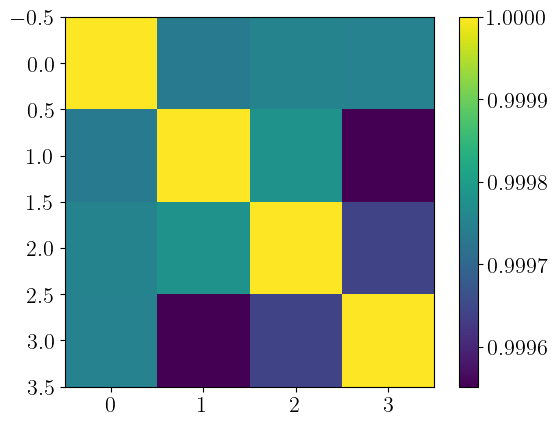

In [ ]:
corr500 = cov_num500/np.outer(np.sqrt(np.diag(cov_num500)),np.sqrt(np.diag(cov_num500)))

plt.imshow(cov_num500/np.outer(...))
plt.show()

# positive semi-definite: x^T C x >= 0  ,  (upsidedown A) x (epsilon) (real numbers)^n

# number of realisations must be more than rank of covariance matrix

### Task 4: Test for all four covariance matrices if you recover a $\chi^2$ distribution with the mean and variance. What do you observe? 

In [ ]:

inv_cov = inv(cov_num500)
chi2 = []
for i in range(10000):
    ...
plt.hist()

#print(mean and variance)

#comment your result

#Do it for the covariance matrices







TypeError: hist() missing 1 required positional argument: 'x'

### Task 5: Repeat the same exercise from before, but debias your inverse covriance matrix with the so-called Hartlap factor. What do you observe?

In [ ]:


n_r = # number of realisations used
n_d = # diemension of the model 
h = (n_r-1)/(n_r-n_d-2)

inv_cov = inv(cov_num500)/h

#.... plot and check mean and variance



### Task 6: Repeat task 5 again, but this time, test if set 2 also follows a $\chi^2$ distribution. What do you observe?

In [ ]:


n_r = 500
n_d = len(model)
h=(n_r-1)/(n_r-n_d-2)

inv_cov = inv(cov_num500)/h
chi2 = []
for i in range(10000):
    ...
    # use set 2 to compute the chi2
    
# what is happening in comparison to the taak before?




### Bonus Task 1: Create a new set of 10000 noisy data vectors using the numerical covariance matrix measured from 1000 noisy data vectors. Is it possible to reduce the noise in the covariance matrix with this method? Test if set 1 follows a $\chi^2$ distribution which the newly created covaraince matrix. What do you observe?

In [ ]:
noisy_data_set3=np.random.multivariate_normal(...)
cov_num10000_set3 = np.cov(...)



### Bonus task 2: What is the minimum number of data vectors such that the inverse covariance matrix is non-singular? What is an easy tool to test this? Is an analytical covariance matrix always invertible? What can you do if it is not invertible? 